<a href="https://colab.research.google.com/github/rajitakolla/pythonCode/blob/master/gender_pay_gap_salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pip

In [3]:
pip install pandas

In [4]:
pip install datascience

     |████████████████████████████████| 71kB 2.2MB/s 
  Created wheel for folium: filename=folium-0.2.1-cp36-none-any.whl size=79979 sha256=d7e1a62ec2376c9d2aabd53906bb5cfd9cd5158da2bf545c47cdb82ecab36600
  Stored in directory: /root/.cache/pip/wheels/b8/09/f0/52d2ef419c2aaf4fb149f92a33e0008bdce7ae816f0dd8f0c5
Successfully built folium
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [5]:
pip install datatable

     |████████████████████████████████| 59.9MB 63kB/s 
     |████████████████████████████████| 81kB 9.0MB/s 


This assignment is developed based on the three datasets collected from Kaggle.com at: https://www.kaggle.com/
theoviel/kagglers-gender-pay-gap-salary-prediction. You may refer the website for explanation, cleaning, visualization, and basic analysis of the datasets. The three datasets: surveySchema.csv, freeFormResponses.csv, multipleChoiceResponses.csv.

Complete the following tasks:
1. Calculate the median income of male employees and the median income of female employee in the population.
(look the set of all employees in the datasets as the population). 
2. Drawanoverlaidgraphtoshowthehistogramsoftheincomesoffemaleandmaleemployeesinthepopulation. (Youcreateonehistogramformale, andanotherhistogramforfemale, butthetwohistogramswillbedisplayed in the same graph with diﬀerent colors)

3. Use the random sampling, empirical distribution, sample comparison, bootstrap, hypothesis testing as well as A/B testing we discussed in the class to analyze the income gap between female and male employees.
•Select a sample from the population. make sure your sample include 500 employees selected from the population, and consider how to ensure the sampling strategy is fair since the datasets include overwhelmed male employees than female employees. 
• Deﬁne test statistic, null hypothesis and alternative hypothesis. 
• Draw the income histogram for the sample, calculate the median income of the sample, and draw a red dot and a yellow dot of the female median income and male median income of the population, respectively, in the histogram. 
• Draw the histogram of the test statistic of the sample, and draw a red dot to show the corresponding test statistic of the population (e.g. the diﬀerence of the median incomes between female and male employees) in the diagram. 
• Write a procedure to use bootstrap to produce at least 5000 samples. 
• Draw the histogram of the test statistic of the bootstrap samples. 
• Deﬁne conﬁdence interval and P-value to validate the hypothesis you deﬁned. 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Gender,SAL median
Female,25000
Male,35000


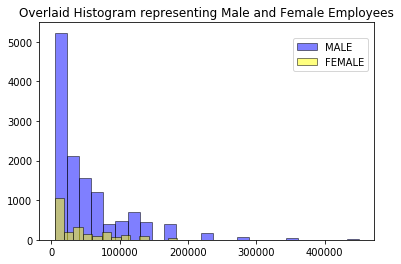

      Gender       Salary       SAL
5775    Male  100-125,000  112500.0
4264    Male     0-10,000    5000.0
5402    Male     0-10,000    5000.0
7787    Male    50-60,000   55000.0
1549    Male  100-125,000  112500.0
...      ...          ...       ...
1353  Female     0-10,000    5000.0
1110  Female    50-60,000   55000.0
2260  Female    10-20,000   15000.0
817   Female    50-60,000   55000.0
282   Female    80-90,000   85000.0

[500 rows x 3 columns]


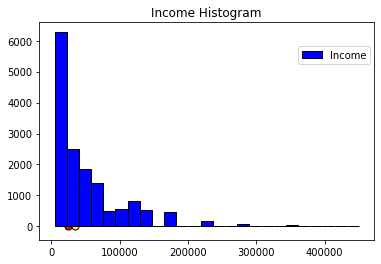

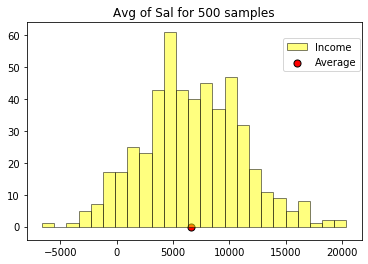

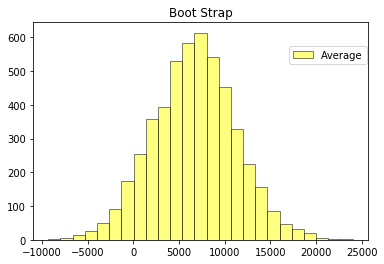

In [192]:
import datatable as dt
import datascience as ds
import pandas as pd
import numpy as np
import matplotlib as mat
%matplotlib inline

sample_size = 250
total_sample_size = 500
boot_strap_sample = 5000

def frame_dict(values):
  keys = []
  for i in values:
    if(i=="0"):
      keys.append(0)
    elif(i.rfind("-")!=-1):
      value = i.replace(",","").split("-")
      keys.append((int(value[0]+"000") + int(value[1]))/2)
    elif(i.rfind("+")!=-1):
      keys.append(int(i.replace(",","").replace("+","")))
    else:
      keys.append(0)  
  return (dict(zip(values,keys)))
  pass


def create_an_array():
  return ds.make_array()
  pass

def find_the_median(tableData, name, funct, *values):
  return tableData.select(*values).group(name,funct)
  pass


#FIND THE AVERAGE INCOME OF MALE AND FEMALE EMPLOYEES
def execute_q1():
  dataDF = pd.read_csv("/content/sample_data/multipleChoiceResponses.csv")
  #elimiate level 0 row
  dataDF = pd.DataFrame(dataDF.drop(0))
  #extract only required columns
  genderSal = dataDF[["Q1","Q9"]].rename(columns={"Q9":"Salary","Q1":"Gender"}).fillna("0").dropna(how="all")
  listOfValues = genderSal["Salary"].unique()
  dict_mappers = frame_dict(listOfValues)
  genderSal["SAL"] = genderSal["Salary"].apply(lambda x:dict_mappers[x])
  tbData = ds.Table.from_df(genderSal).where("Salary",ds.are.containing("-") or ds.are.containing("+")).where("Gender",ds.are.containing("ale"))
  find_the_median(tbData,"Gender",np.median,"Gender","SAL").show()
  return tbData.select("Gender","Salary","SAL")
  pass



#PLOT THE MALE AND FEMALE EMPLOYEES INCOME
def execute_q2(maleDF,femaleDF):
  mat.pyplot.title("Overlaid Histogram representing Male and Female Employees")
  line_up = mat.pyplot.hist(maleDF["SAL"],bins=25,alpha= 0.5,density=None,label="MALE",color="blue")
  line_down = mat.pyplot.hist(femaleDF["SAL"],bins=25,alpha=0.5,density=None,label="FEMALE",color="yellow")
  mat.pyplot.legend(loc=10,bbox_to_anchor=(.87,.85))
  mat.pyplot.show(block=False)
  pass 


# CONSIDER EQUAL PARTITIONS OF MALE AND FEMALE EMPLOYEES
def sampling_data(maleDF,femaleDF):
  maleIncDF = maleDF.sample(sample_size)
  femaleIncDF = femaleDF.sample(sample_size)
  samplingTable = maleIncDF.append(femaleIncDF)
  return samplingTable
  pass

#plot income median graph
def plot_graph_income_hist(maleDF,femaleDF):
  mat.pyplot.title("Income Histogram")
  mat.pyplot.hist(maleDF.append(femaleDF)["SAL"],bins=25,label="Income",density=None,color="blue",rwidth=5)
  mat.pyplot.scatter(35000,0,color="yellow",s=50,marker='o',edgecolors='black')
  mat.pyplot.scatter(25000,0,color="red",s=50,marker='o',edgecolors='black')
  mat.pyplot.legend(loc=10,bbox_to_anchor=(.88,.85))
  mat.pyplot.show(block=False)
  pass



def testing_sampling(maleDF,femaleDF):
  #fetch an empty array
  res_array = create_an_array()
  for i in np.arange(total_sample_size):
    male_female_sample= sampling_data(maleDF,femaleDF)
    male_female_sample_table = ds.Table.from_df(male_female_sample)
    avg_sal_df = find_the_median(male_female_sample_table,"Gender",np.average,"Gender","SAL").to_df()
    res_array = np.append(res_array, avg_sal_df.iloc[1]["SAL average"]-avg_sal_df.iloc[0]["SAL average"])
  # print(res_array)
  final_Male_female_df = maleDF.append(femaleDF)
  mean_df = find_the_median(ds.Table.from_df(final_Male_female_df),"Gender",np.average,"Gender","SAL").to_df()
  total_res = mean_df.iloc[1]["SAL average"]-mean_df.iloc[0]["SAL average"]
  mat.pyplot.title("Avg of Sal for 500 samples")
  mat.pyplot.hist(res_array,bins=25,alpha=0.5,color='yellow',label="Income")
  mat.pyplot.scatter(total_res,0,s=50,color='red',edgecolors="black",label='Average')
  mat.pyplot.legend(loc=10,bbox_to_anchor=(.88,.85))
  mat.pyplot.show(block=False)
  pass

#boot strap method
def boot_strap(maleDF,femaleDF):
  res_array = create_an_array()
  for i in np.arange(boot_strap_sample):
    male_female_sample= sampling_data(maleDF,femaleDF)
    male_female_sampleDF = male_female_sample.sample()
    male_female_sample_table = ds.Table.from_df(male_female_sampleDF)
    mean_df = find_the_median(ds.Table.from_df(male_female_sample),"Gender",np.average,"Gender","SAL").to_df()
    res_array = np.append(res_array,mean_df.iloc[1]['SAL average']-mean_df.iloc[0]['SAL average'])
  mat.pyplot.title("Boot Strap")
  mat.pyplot.hist(res_array,bins=25,alpha=0.5,color="yellow",histtype='bar',orientation='vertical',label="Average")
  mat.pyplot.legend(loc=10,bbox_to_anchor=(.88,.85))
  mat.pyplot.show(block=False)
  pass

def execute_q3(maleDF,femaleDF):
  # Q1
  sampling_values = sampling_data(maleDF,femaleDF)
  print(sampling_values)
  # Q3
  plot_graph_income_hist(maleDF,femaleDF)
  # Q4
  testing_sampling(maleDF,femaleDF)
  # Q6
  boot_strap(maleDF,femaleDF)
  pass


def executor():
  median_sal_of_male_and_female_emp = execute_q1()
  maleDF = median_sal_of_male_and_female_emp.where("Gender",ds.are.containing("Male")).to_df()
  femaleDF = median_sal_of_male_and_female_emp.where("Gender",ds.are.containing("Female")).to_df()
  execute_q2(maleDF,femaleDF)
  execute_q3(maleDF,femaleDF)
  pass

executor()

